# Day 15 Analysis

Much has been made about Tyreek Hill's receiving yards for the 2022 season so far. But how does he compare as a wide receiver to the previous best season by receiving yards? Let's take a look.

## Set Up

In [67]:
import pandas as pd
from os import path
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Create database connection
conn = sqlite3.connect('../../data/db/database.db')

## Receiving Yards in 2022 (So Far)
Before drilling down to Tyreek Hill specifically, let's investigate receiving yards and other WR stats through Week 9 to see if there's anything interesting.

In [68]:
query = """
SELECT
    player_id,
    player_display_name AS player_name,
    week,
    receiving_yards AS rec_yds,
    receiving_tds AS rec_tds,
    receiving_air_yards AS rec_air_yds,
    ROUND(fantasy_points,2) AS pts,
    ROUND(fantasy_points_ppr,2) AS pts_ppr,
    COUNT() OVER(PARTITION BY player_id) AS games_played
FROM weekly 
WHERE season = 2022
    AND week <= 9
    AND position = 'WR'
    AND season_type = 'REG'
"""

df_2022 = pd.read_sql(query, conn)

In [69]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     1085 non-null   object 
 1   player_name   1085 non-null   object 
 2   week          1085 non-null   int64  
 3   rec_yds       1085 non-null   float64
 4   rec_tds       1085 non-null   int64  
 5   rec_air_yds   1085 non-null   float64
 6   pts           1085 non-null   float64
 7   pts_ppr       1085 non-null   float64
 8   games_played  1085 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 76.4+ KB


In [70]:
df_2022[['rec_yds', 'pts', 'pts_ppr', 'games_played']].describe().round(3)

,rec_yds,pts,pts_ppr,games_played
count,1085.000,1085.000,1085.000,1085.000
mean,38.312,5.261,8.301,6.626
std,37.130,5.653,7.773,2.077
min,-5.000,-2.000,-1.000,1.000
25%,8.000,1.000,2.100,6.000
50%,27.000,3.300,6.100,7.000
75%,59.000,8.000,12.600,8.000
max,190.000,33.600,44.800,9.000


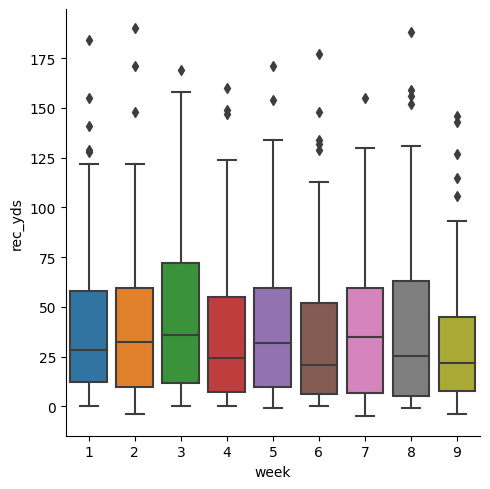

In [71]:
sns.catplot(
    x="week",
    y="rec_yds",
    data=df_2022,
    kind="box"
)

Interestingly enough, Week 3 seems to have the most "high performers" in terms of receiving yards since it has the highest mean (it's heavily right-skewed).

Looking at PPR points by week, Week 2 actually has a higher mean, but lower median than Week 3. We can say that Week 3 looks to be the best in terms of yards and fantasy points so far.

In [72]:
df_2022.groupby('week')[['rec_yds', 'pts_ppr']].describe().round(3)

rec_yds                                                 pts_ppr         \
       count    mean     std  min    25%   50%    75%    max   count   mean   
week                                                                          
1      134.0  38.739  36.454  0.0  12.25  28.5  57.75  184.0   134.0  8.524   
2      128.0  40.539  38.486 -4.0   9.75  32.5  59.50  190.0   128.0  9.365   
3      123.0  44.073  38.414  0.0  12.00  36.0  72.00  169.0   123.0  9.074   
4      126.0  37.484  37.755  0.0   7.00  24.5  55.00  160.0   126.0  7.664   
5      127.0  39.079  36.801 -1.0   9.50  32.0  59.50  171.0   127.0  8.157   
6      113.0  34.611  36.603  0.0   6.00  21.0  52.00  177.0   113.0  7.920   
7      112.0  38.839  34.750 -5.0   6.75  35.0  59.50  155.0   112.0  8.360   
8      118.0  38.237  40.550 -1.0   5.25  25.5  63.00  188.0   118.0  8.292   
9      104.0  31.817  33.175 -4.0   7.75  22.0  45.00  146.0   104.0  7.099   

                                             
        std  min    25%   50%     75%   max  
week                                         
1     7.740 -0.7  2.775  6.50  12.475  39.4  
2     9.211 -1.0  2.600  7.10  13.000  44.8  
3     7.443 -0.2  2.850  7.30  14.400  30.9  
4     7.395  0.0  1.700  5.64  12.075  31.0  
5     7.289  0.0  2.100  6.50  12.000  32.1  
6     7.736 -0.5  1.800  4.80  12.800  32.2  
7     7.237  0.0  2.150  7.40  12.325  33.0  
8     8.246  0.0  1.600  6.15  12.660  39.6  
9     7.338  0.0  1.800  4.35  10.375  36.6

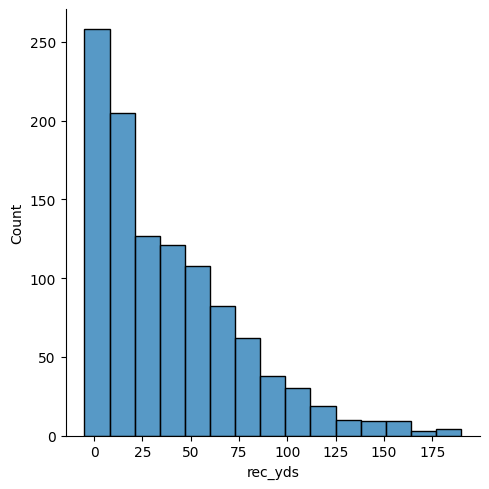

In [73]:
sns.displot(
    x="rec_yds",
    data=df_2022,
    kind="hist",
    bins=15
)

The distribution for receiving yards is heavily right-skewed, with the majority of performances around 25-35 yards. This is actually somewhat surprising! Is this typical for previous seasons? Definitely something to dive into in a future analysis.

## Tyreek in 2022

In [74]:
# Tyreek Hill's games
tyreek_2022 = df_2022[df_2022['player_name'] == 'Tyreek Hill'][['player_name', 'week', 'rec_yds', 'rec_tds', 'rec_air_yds', 'pts', 'pts_ppr']]

tyreek_tot_yds = tyreek_2022['rec_yds'].sum()
tyreek_yds_per_game = round(tyreek_tot_yds/len(tyreek_2022),2)

tyreek_2022

,player_name,week,rec_yds,rec_tds,rec_air_yds,pts,pts_ppr
221,Tyreek Hill,1,94.0,0,109.0,10.0,18.0
222,Tyreek Hill,2,190.0,2,138.0,31.0,42.0
223,Tyreek Hill,3,33.0,0,34.0,3.3,5.3
224,Tyreek Hill,4,160.0,0,172.0,15.9,25.9
225,Tyreek Hill,5,47.0,0,32.0,6.0,13.0
226,Tyreek Hill,6,177.0,0,181.0,17.7,29.7
227,Tyreek Hill,7,72.0,0,171.0,7.2,14.2
228,Tyreek Hill,8,188.0,0,222.0,19.5,31.5
229,Tyreek Hill,9,143.0,1,112.0,20.3,27.3


In [75]:
print(f"Total receiving yards for 2022: {tyreek_tot_yds}")
print(f"Rec yds per game for 2022: {tyreek_yds_per_game}")

print(f"On pace for {tyreek_yds_per_game * 17} receiving yards for 2022")

Total receiving yards for 2022: 1104.0
Rec yds per game for 2022: 122.67
On pace for 2085.39 receiving yards for 2022


So tyreek Hill has totalled 1,104 yards in 9 games for an average of 122.67 yards per game. He is on pace to total more than 2,000 receiving yards this season, a feat that hasn't been done since...?

Has it been done?

## Tyreek vs. History

In [76]:
# Get best WR season (by receiving yards)
query = """
WITH data AS (
    SELECT
        player_id,
        player_display_name AS player_name,
        season,
        SUM(receiving_yards) AS tot_rec_yds,
        SUM(receiving_tds) AS tot_rec_tds,
        SUM(receiving_air_yards) AS tot_rec_air_yds,
        ROUND(SUM(fantasy_points),2) AS pts,
        ROUND(SUM(fantasy_points_ppr),2) AS pts_ppr,
        COUNT(*) AS games_played
    FROM weekly 
    WHERE position = 'WR'
        AND season_type = 'REG'
    GROUP BY player_id, player_name, season
)
SELECT
    player_name,
    season,
    tot_rec_yds,
    tot_rec_tds,
    (tot_rec_yds / games_played) AS yds_per_gm,
    (1.0 * tot_rec_tds / games_played) AS tds_per_gm,
    (tot_rec_air_yds / games_played) AS air_yds_per_gm,
    (pts / games_played) AS pts_per_gm,
    (pts_ppr / games_played) AS pts_ppr_per_gm,
    games_played
FROM data
WHERE tot_rec_yds >= (
    SELECT MAX(tot_rec_yds)
    FROM data
)
"""

top_wr = pd.read_sql(query, conn)

In [77]:
top_wr

,player_name,season,tot_rec_yds,tot_rec_tds,yds_per_gm,tds_per_gm,air_yds_per_gm,pts_per_gm,pts_ppr_per_gm,games_played
0,Calvin Johnson,2012,1964.0,5,122.75,0.3125,172.0625,13.775,21.4,16


In [78]:
tyreek_2022.groupby('player_name').mean().round(2).drop('week', axis=1)

,rec_yds,rec_tds,rec_air_yds,pts,pts_ppr
player_name,,,,,
Tyreek Hill,122.67,0.33,130.11,14.54,22.99


Actually, a season with 2,000 yards hasn't been accomplished (at least from 1999-2022 which is the extent of my data). Calvin Johnson (aka Megatron) had the most single season yards at 1,1964 with an average of 122.75 yds/game. Comparing key stats:

| Stat (per Game)   | Tyreek (2022) | Megatron (2012) |
| ----------------- | ------------- | --------------- |
| Yards             | 122.67        | 122.75          |
| Touchdowns        | 0.33          | 0.31            |
| Air Yards         | 130.11        | 172.06          |
| Points (Standard) | 14.54         | 13.78           | 
| Points (PPR)      | 22.99         | 21.40           |

Extremely similar raw yards and TDs per game. However, Tyreek is performing as well on **32% less** air yards per game. Tyreek is known as an extremely speedy player so my hunch is that he is getting a lot of his yards after the catch. Something to explore in the future.

In conclusion, Tyreek is having a historically good season in terms of receiving yards. He is keeping up with Megatron's incredible 2012 season where he had the most receiving yards of any Wide Receiver in NFL history. However, we can't ignore the fact that **there are 17 games in the 2022 season** vs. 16 games in 2012. Based on his per game average, Megatron would have totalled over 2,000 receiving yards!

I'll continue to monitor Tyreek's season and see how he matches up on various stats on a *per game basis*. Given that this season is 1 more game than usual, it makes sense to focus on per game averages to compare players across seasons.